---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [3]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [10]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
a=pd.read_csv("sbikedata.csv")
# a.head()
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


In [11]:
# a["date"].value_counts()
a["date"]=pd.to_datetime(a["date"])
a["date"].value_counts()
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 :  귀무가설 : 미세먼지와 따릉이 간에는 연관성이 없다.        대립가설 : 미세먼지와 따릉이 간에는 연관성이 있다.

- 가설 3 :  귀무가설 : 초미세먼지와 따릉이 간에는 연관성이 없다.      대립가설 : 초미세먼지와 따릉이 간에는 연관성이 있다.

- 가설 4 :  귀무가설 : 시간와 따릉이 간에는 연관성이 없다.            대립가설 : 시간와 따릉이 간에는 연관성이 있다.

- 가설 5 :  귀무가설 : 가시성와 따릉이 간에는 연관성이 없다.          대립가설 : 가시성와 따릉이 간에는 연관성이 있다.

- 가설 6 :   귀무가설 : 강우여부와 따릉이 간에는 연관성이 없다.        대립가설 : 강우여부와 따릉이 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [17]:
#변수의 자료형을 확인해보세요.
a['hour'].value_counts()

1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: hour, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [13]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

In [16]:
#변수의 기초 통계량을 확인해보세요.
a['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

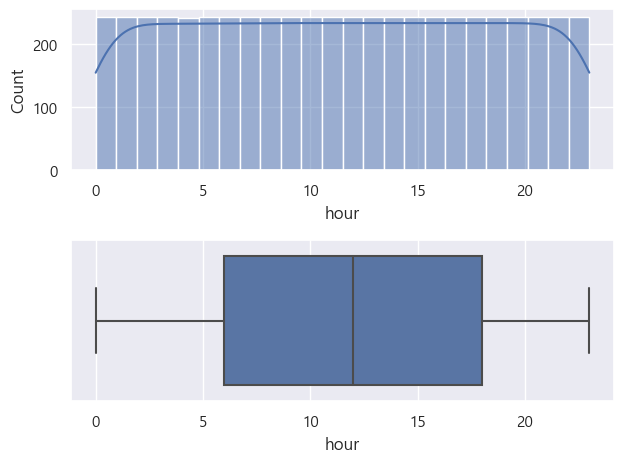

In [15]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a['hour'],kde=True,bins=24)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["hour"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [19]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [20]:
#변수의 자료형을 확인해보세요.
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [2]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 


4. 변수의 기초 통계량 확인

In [21]:
#변수의 기초 통계량을 확인해보세요
a["temperature"].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

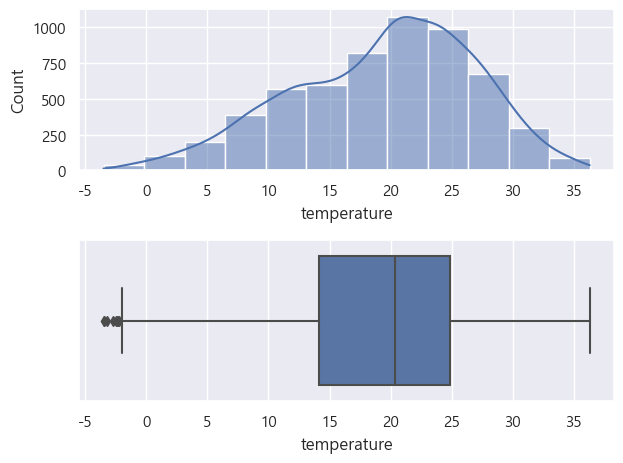

In [29]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a["temperature"],kde=True,bins=12)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["temperature"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

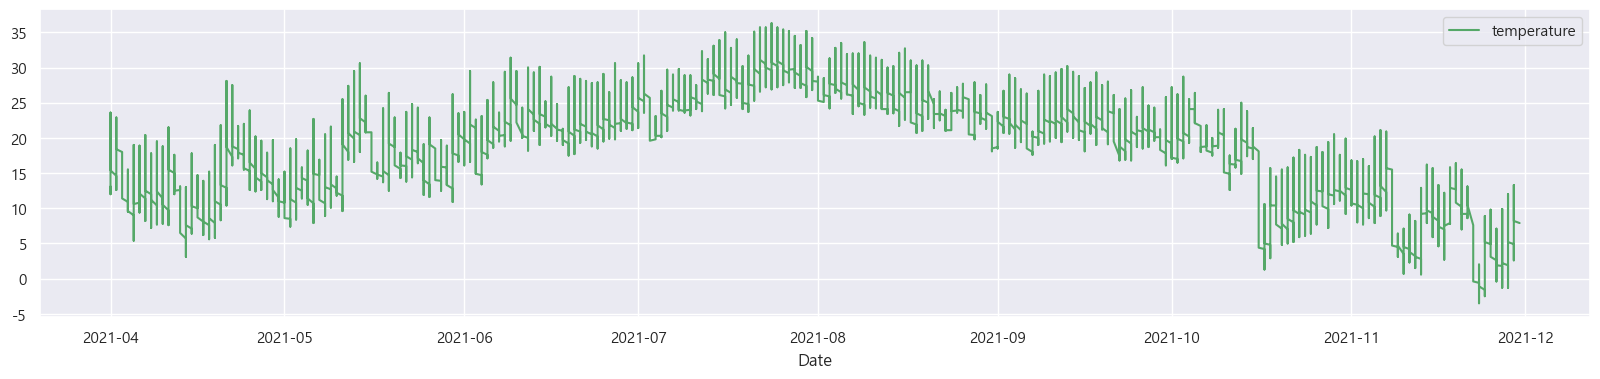

In [57]:
plt.figure(figsize=(20,4))
plt.plot('date', 'temperature', 'g-', data = a)

plt.xlabel('Date')
plt.legend()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [31]:
#위 정보로부터 파악하신 내용을 정리해보세요.
#이상치가 있긴 하지만 제거하지않고 진행

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.
#범주형

3. 변수의 결측치 존재 여부 및 조치방안

In [32]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
a.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

In [33]:
#변수의 기초 통계량을 확인해보세요
a["precipitation"].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

5. 변수의 분포 확인

In [37]:
#변수의 분포를 확인해보세요.
a["precipitation"].value_counts()/a.shape[0]

0    0.924489
1    0.075511
Name: precipitation, dtype: float64

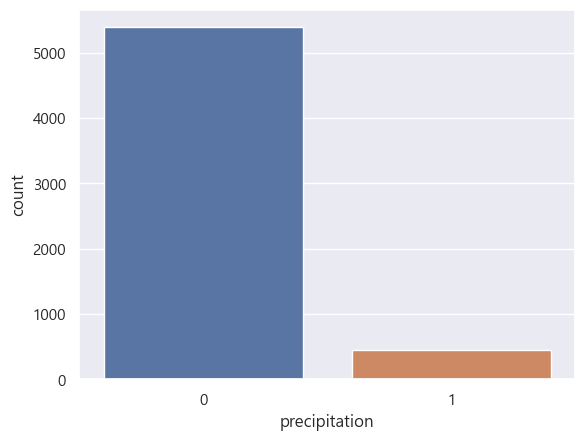

In [39]:
sns.countplot(x=a["precipitation"])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [41]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

In [42]:
#변수의 기초 통계량을 확인해보세요
a["windspeed"].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

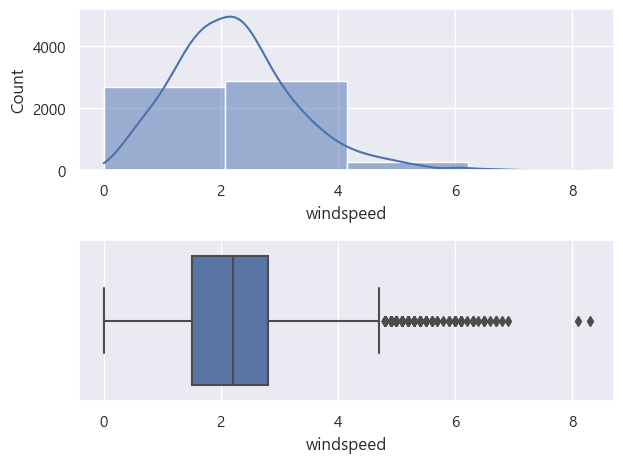

In [48]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a["windspeed"],kde=True,bins=4)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["windspeed"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()


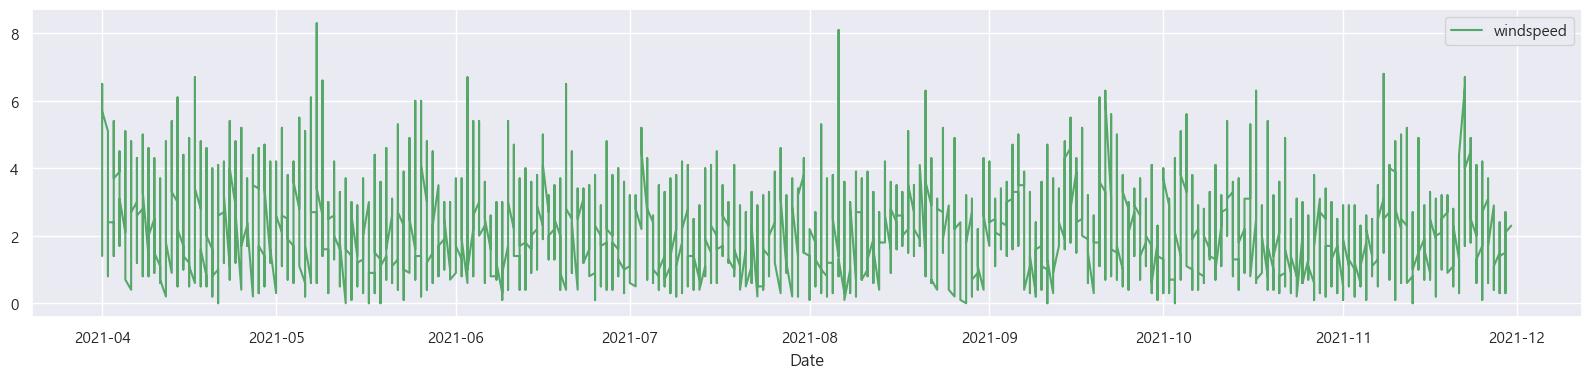

In [56]:
plt.figure(figsize=(20,4))
plt.plot('date', "windspeed", 'g-', data = a)

plt.xlabel('Date')
plt.legend()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [49]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
a["humidity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [50]:
#변수의 기초 통계량을 확인해보세요
a["humidity"].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

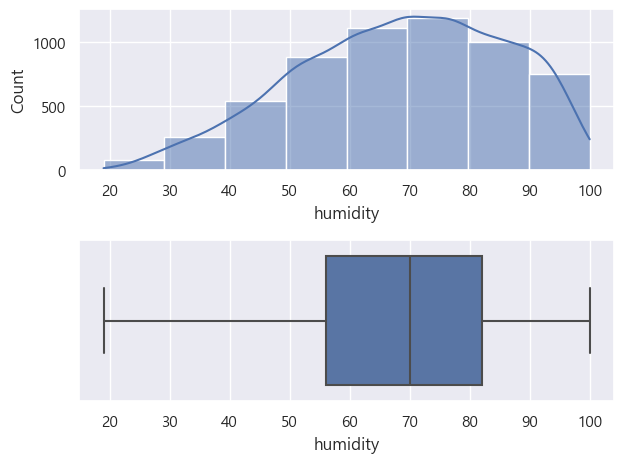

In [54]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a["humidity"],kde=True,bins=8)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["humidity"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

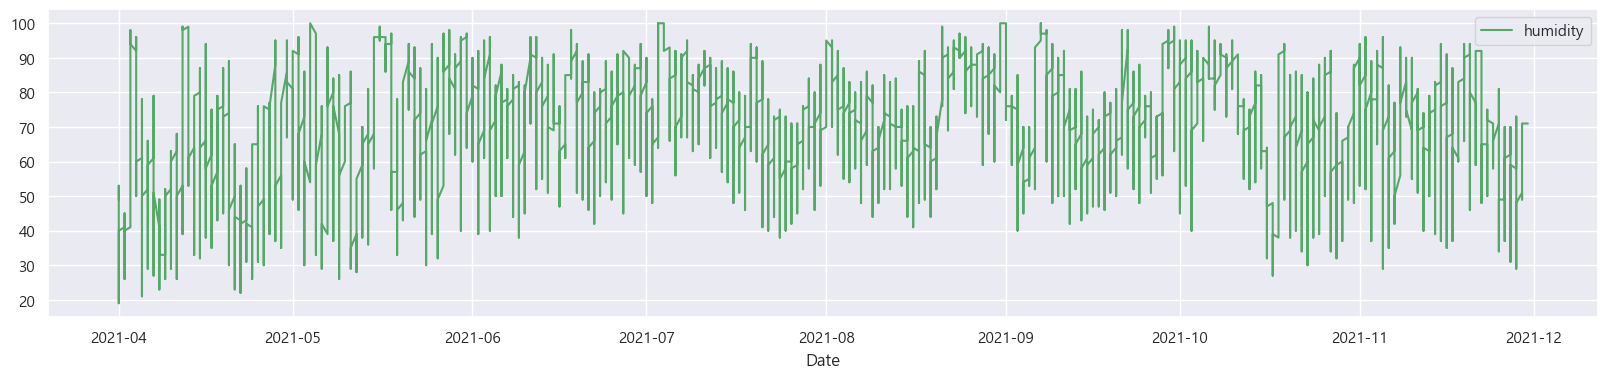

In [58]:
plt.figure(figsize=(20,4))
plt.plot('date', "humidity", 'g-', data = a)

plt.xlabel('Date')
plt.legend()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [59]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

In [60]:
#변수의 기초 통계량을 확인해보세요
a["visibility"].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

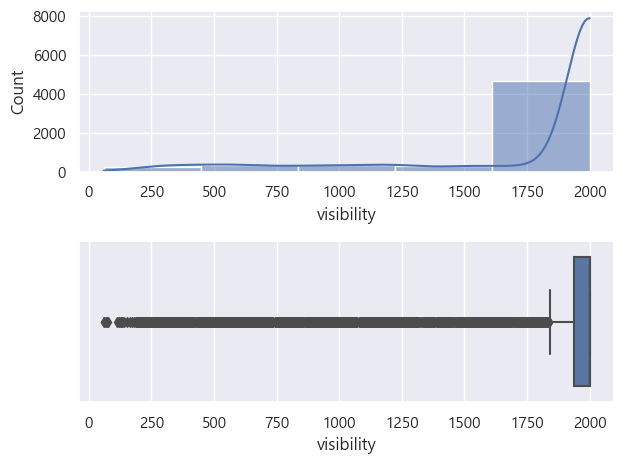

In [63]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a["visibility"],kde=True,bins=5)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["visibility"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

In [69]:
a["visibility"].value_counts()

2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [70]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

In [71]:
#변수의 기초 통계량을 확인해보세요
a["ozone"].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

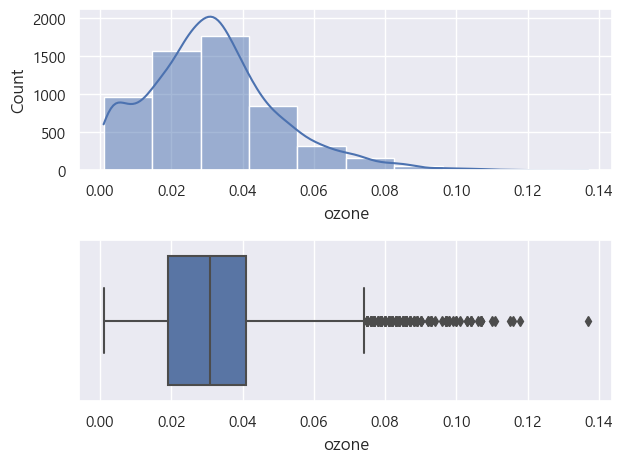

In [75]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a["ozone"],kde=True,bins=10)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["ozone"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

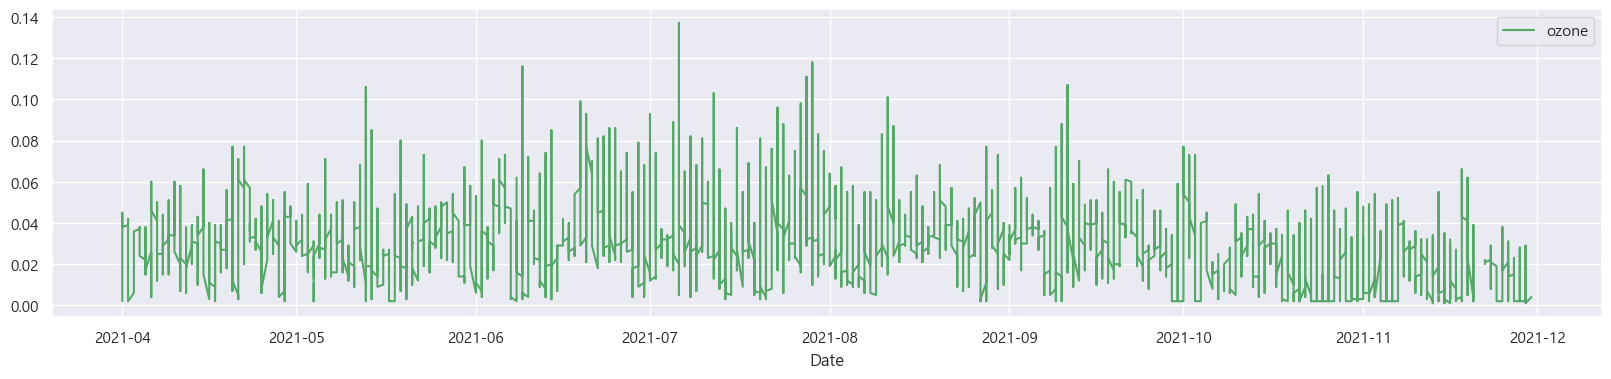

In [76]:
plt.figure(figsize=(20,4))
plt.plot('date', "ozone", 'g-', data = a)

plt.xlabel('Date')
plt.legend()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [77]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

In [78]:
#변수의 기초 통계량을 확인해보세요
a["PM10"].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

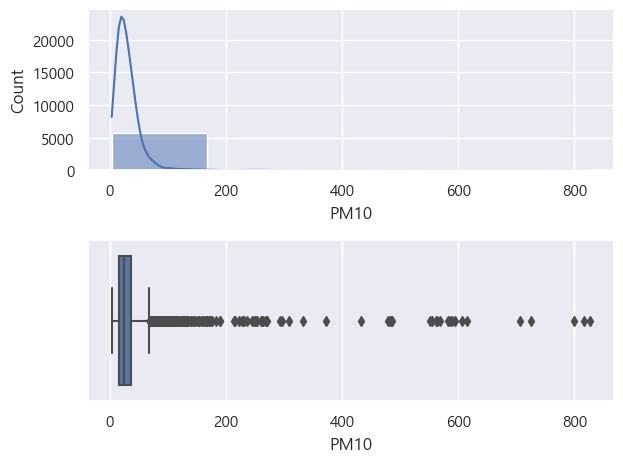

In [80]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a["PM10"],kde=True,bins=5)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["PM10"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

In [81]:
a["PM10"].value_counts()

18.0     181
22.0     179
20.0     177
16.0     174
23.0     173
        ... 
296.0      1
373.0      1
433.0      1
479.0      1
332.0      1
Name: PM10, Length: 189, dtype: int64

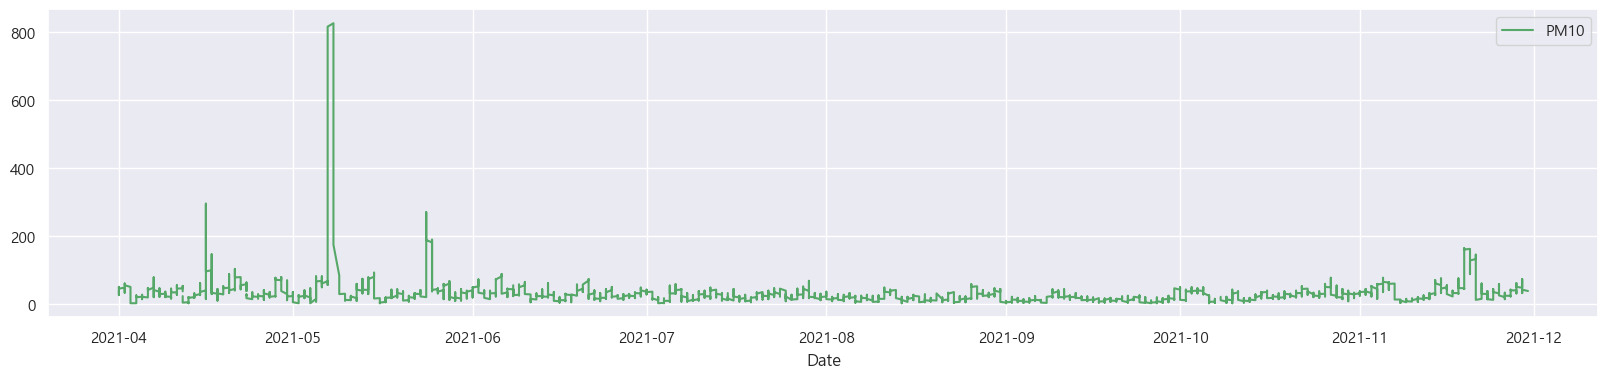

In [82]:
plt.figure(figsize=(20,4))
plt.plot('date', "PM10", 'g-', data = a)

plt.xlabel('Date')
plt.legend()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [83]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

In [84]:
#변수의 기초 통계량을 확인해보세요
a["PM2.5"].describe()

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

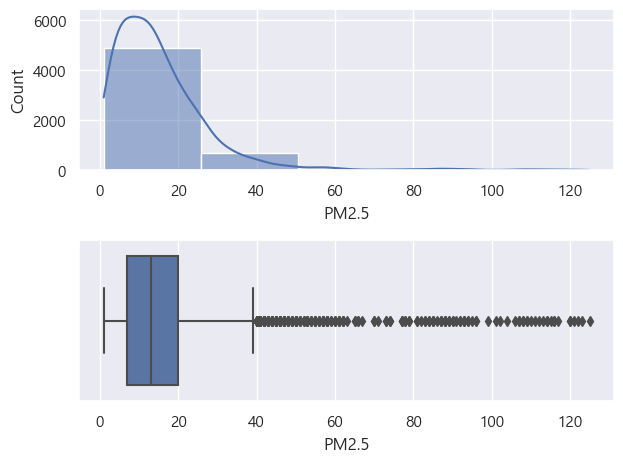

In [86]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a["PM2.5"],kde=True,bins=5)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["PM2.5"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

In [87]:
a["PM2.5"].value_counts()

5.0      265
7.0      262
11.0     259
12.0     256
13.0     255
        ... 
115.0      1
117.0      1
106.0      1
86.0       1
82.0       1
Name: PM2.5, Length: 110, dtype: int64

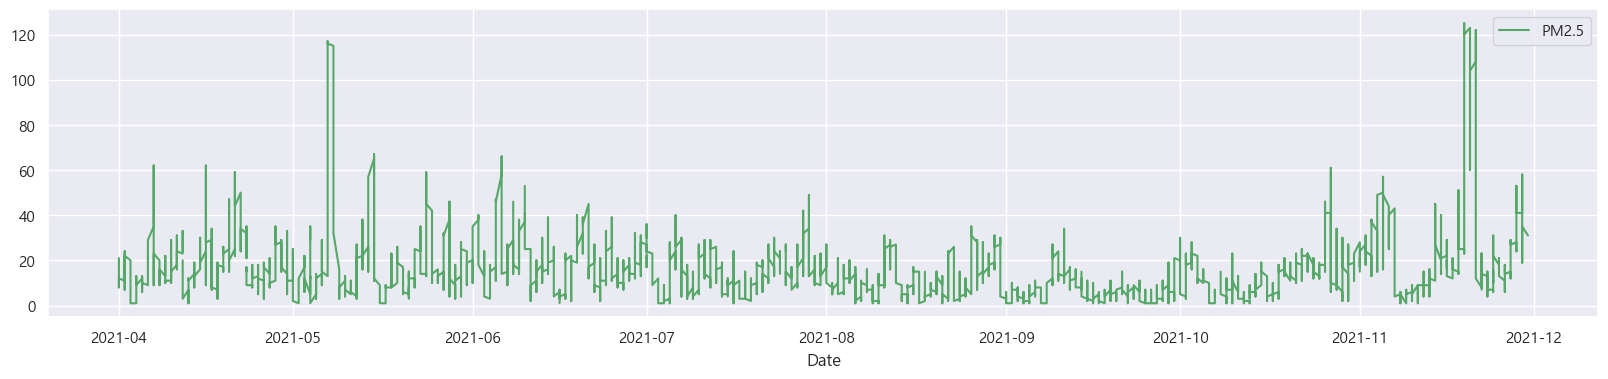

In [88]:
plt.figure(figsize=(20,4))
plt.plot('date', "PM2.5", 'g-', data = a)

plt.xlabel('Date')
plt.legend()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [89]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


4. 변수의 기초 통계량 확인

In [90]:
#변수의 기초 통계량을 확인해보세요
a["count"].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

In [123]:
a.groupby(["date"],as_index=False)[["count"]].sum().sort_values(by="count",ascending=False)
# a.sort_values(by="count",ascending=False)[["date","count","hour"]]

,date,count
154,2021-09-02,12687
27,2021-04-28,11208
26,2021-04-27,8105
177,2021-09-25,7664
178,2021-09-26,7654
...,...,...
221,2021-11-08,813
159,2021-09-07,636
2,2021-04-03,559
45,2021-05-16,110


5. 변수의 분포 확인

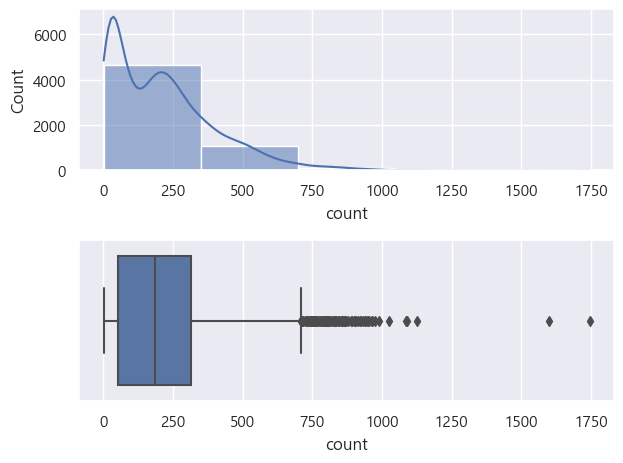

In [92]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x=a["count"],kde=True,bins=5)
# plt.xlabel("bus stop")
plt.subplot(2,1,2)
sns.boxplot(x=a["count"])
# plt.xlabel("bus stop")
plt.tight_layout()
# plt.grid()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

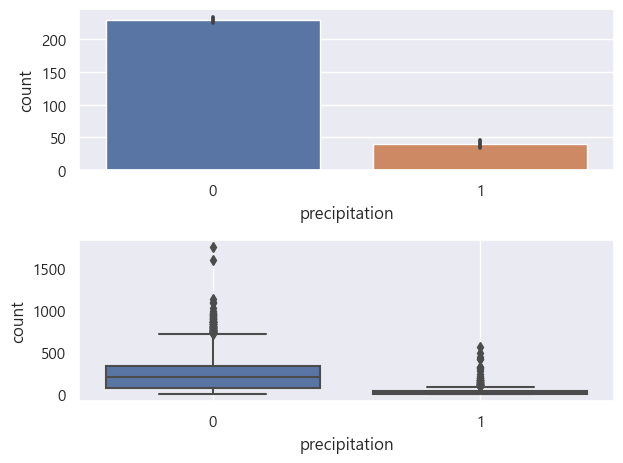

In [96]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
plt.subplot(2,1,1)
sns.barplot(x="precipitation", y="count", data=a)
plt.subplot(2,1,2)
sns.boxplot(x='precipitation', y = 'count', data = a)
plt.tight_layout()
plt.grid()
plt.show()

In [97]:
temp = a.loc[a["precipitation"].notnull()]
c = temp.loc[a["precipitation"]==0, 'count']
d = temp.loc[a["precipitation"]==1, 'count']
spst.ttest_ind(c, d)
##강수여부는 유의함

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

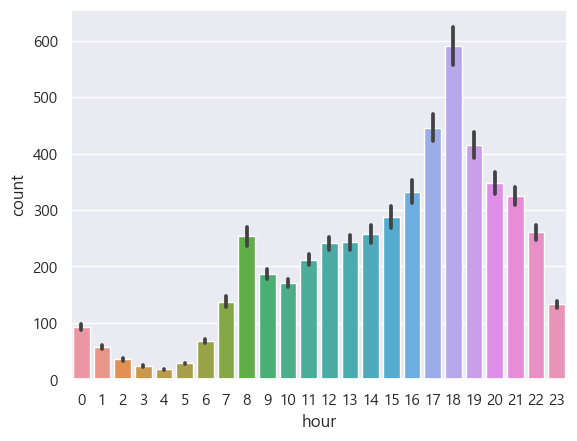

In [175]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(x='hour', y='count', data = a)
plt.show()

In [99]:
spst.pearsonr(a["hour"],a['count'])
##시간대별로 유의하고 강한 상관관계

PearsonRResult(statistic=0.5864350283919396, pvalue=0.0)

3. 온도 데이터와 따릉이 대여량간 분석

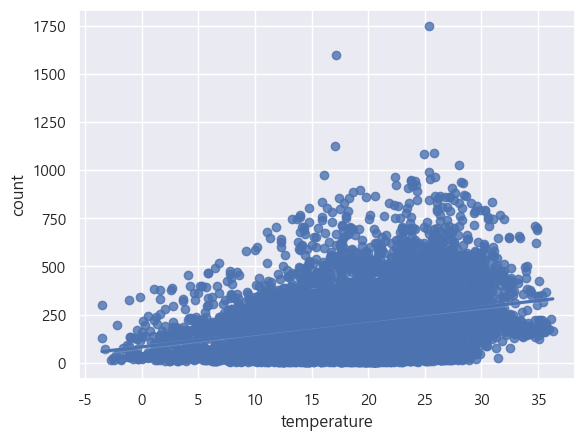

In [101]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x="temperature", y='count', data = a)
plt.show()

In [102]:
spst.pearsonr(a["hour"],a['count'])
##온도는 유의하고 강한 상관관계

PearsonRResult(statistic=0.5864350283919396, pvalue=0.0)

4. 풍속 데이터와 따릉이 대여량간 분석

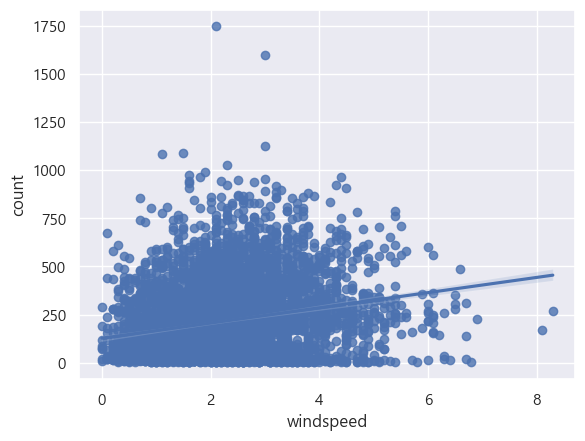

In [103]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x="windspeed", y='count', data = a)
plt.show()

In [104]:
spst.pearsonr(a["windspeed"],a['count'])
##유의o, 중간정도의 상관관계

PearsonRResult(statistic=0.22372189900674902, pvalue=5.243317678297076e-67)

5. 습도 데이터와 따릉이 대여량간 분석

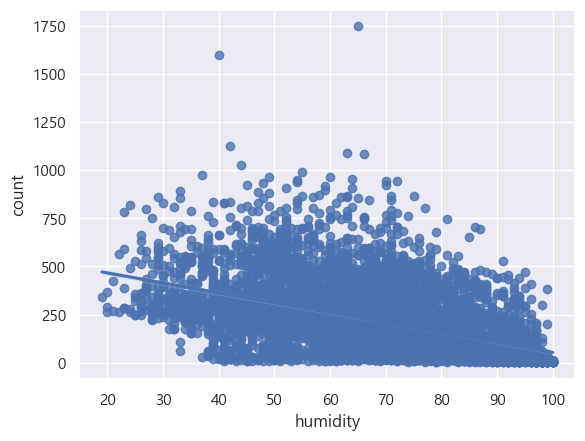

In [105]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x="humidity", y='count', data = a)
plt.show()

In [106]:
spst.pearsonr(a["humidity"],a['count'])
##유의o ,음의상관관계,중간

PearsonRResult(statistic=-0.4789554265904139, pvalue=0.0)

6. 시정 데이터와 따릉이 대여량간 분석

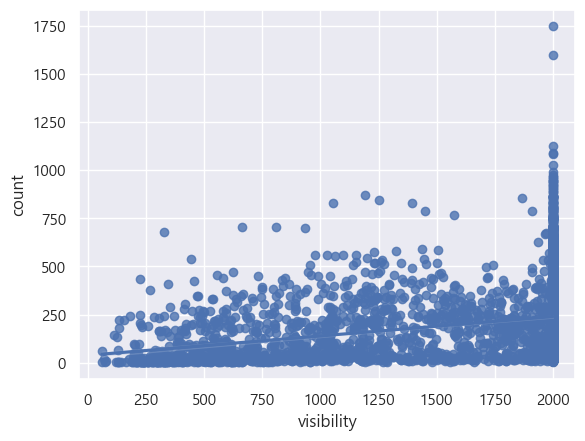

In [107]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x="visibility", y='count', data = a)
plt.show()

In [108]:
spst.pearsonr(a["visibility"],a['count'])
##유의o ,중간

PearsonRResult(statistic=0.2658277832748897, pvalue=7.876003852878639e-95)

7. 오존 데이터와 따릉이 대여량간 분석

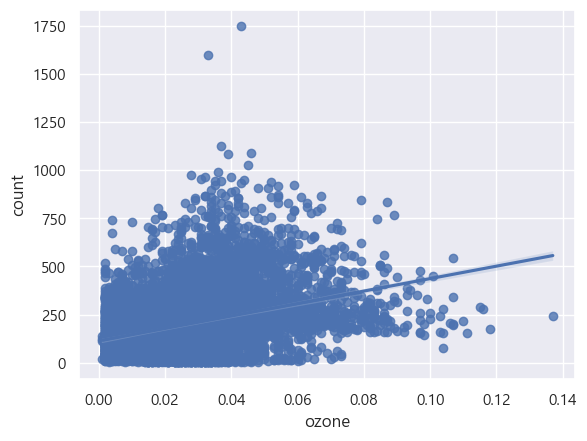

In [109]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x="ozone", y='count', data = a)
plt.show()

In [112]:
# a.info()
temp=a.loc[a["ozone"].notnull()]
spst.pearsonr(temp["ozone"],temp['count'])
##유의o ,중간

PearsonRResult(statistic=0.31608254616029724, pvalue=2.039910841854589e-132)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

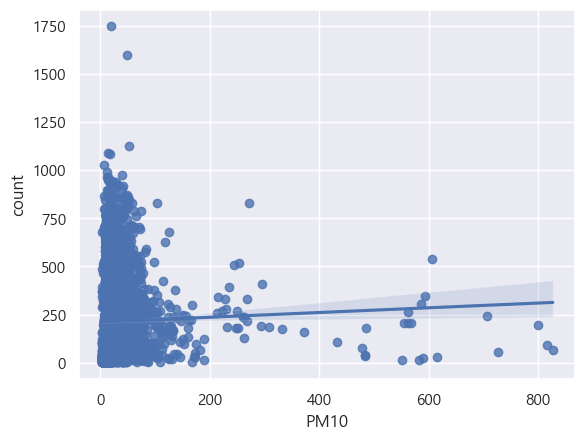

In [114]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x="PM10", y='count', data = a)
plt.show()

In [115]:
temp=a.loc[a["PM10"].notnull()]
spst.pearsonr(temp["PM10"],temp['count'])
##유의o ,거의없음

PearsonRResult(statistic=0.0282823754751442, pvalue=0.032361979319587446)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

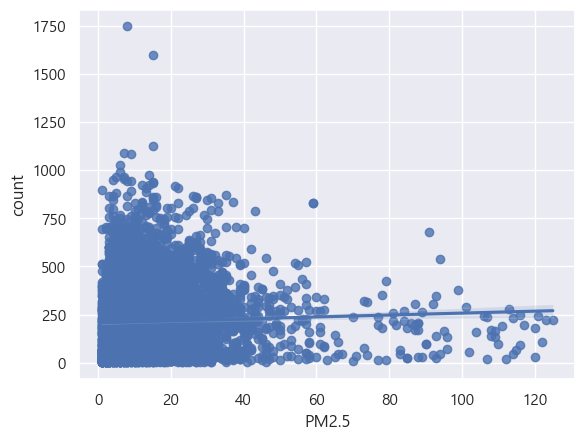

In [116]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x="PM2.5", y='count', data = a)
plt.show()

In [117]:
temp=a.loc[a["PM2.5"].notnull()]
spst.pearsonr(temp["PM2.5"],temp['count'])
##유의o ,거의없음

PearsonRResult(statistic=0.03712975748890091, pvalue=0.00493188735040528)

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

강수여부, 시간, 온도

#### <font color='green'>2. 약한 관계의 변수</font>


나머지


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


x

### [Step6] Insight 도출

온도도 적당하고 여름에 비해 비도 적게오고 장마도없는 봄이나 가을에 많이 탈것이 예상된다. 따라서 자전거를 늘릴계획이라면 봄,가을에 자전거량을 늘린다.

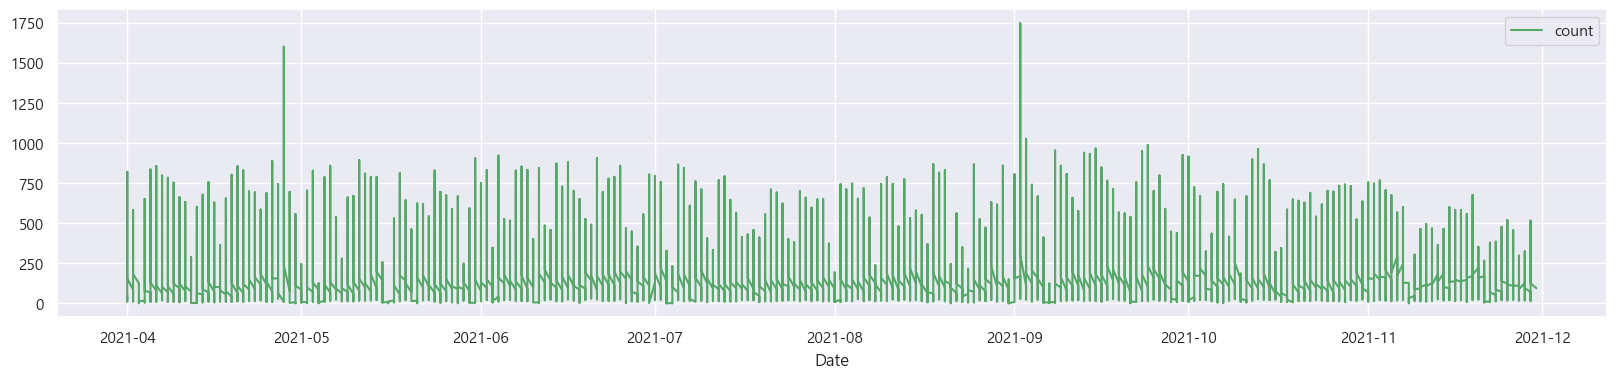

In [124]:
plt.figure(figsize=(20,4))
plt.plot('date', "count", 'g-', data = a)

plt.xlabel('Date')
plt.legend()
plt.show()

In [153]:
a["month"]=a["date"].dt.month
# a.head()
a['season']=a["month"]
a["season"]=a["season"].map({4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:4,12:4})
a.drop("month",axis=1,inplace=True)
a["season"].value_counts()

2    2208
3    1462
1    1460
4     697
Name: season, dtype: int64

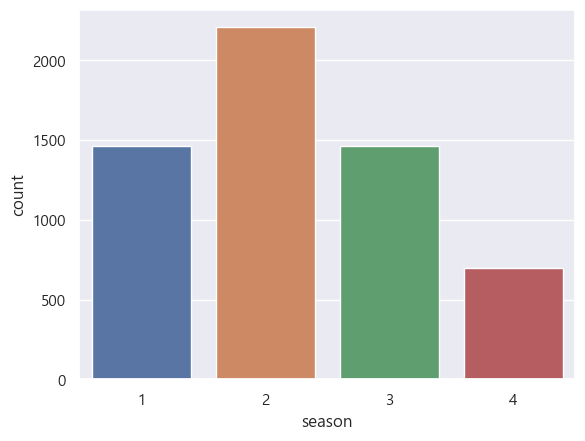

In [155]:
sns.countplot(x=a["season"])
plt.show()

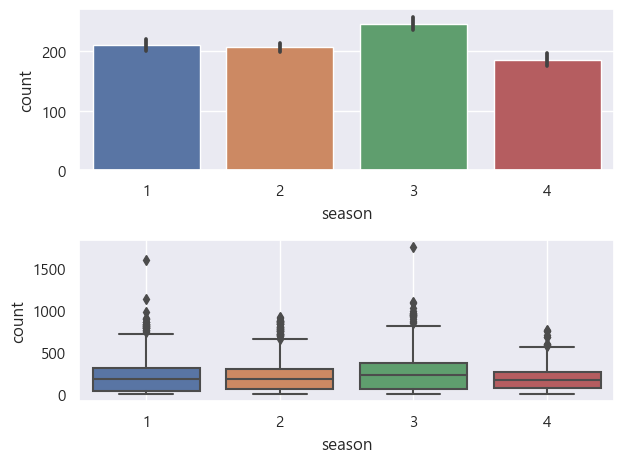

In [154]:
plt.subplot(2,1,1)
sns.barplot(x="season", y="count", data=a)
plt.subplot(2,1,2)
sns.boxplot(x='season', y = 'count', data = a)
plt.tight_layout()
plt.grid()
plt.show()

In [136]:
P_1 = a.loc[a.season == 1, 'count']
P_2 = a.loc[a.season == 2, 'count']
P_3 = a.loc[a.season == 3, 'count']
P_4 = a.loc[a.season == 4, 'count']
spst.f_oneway(P_1, P_2, P_3,P_4)

F_onewayResult(statistic=21.058831681433713, pvalue=1.4518797174133894e-13)

In [149]:
import numpy as np
a["hour1"]=a["hour"]
# a["hour1"]=a['hour1'].map({})
a['hour1'] = np.where(a['hour1'] < 6, 1,a['hour1'])
a["hour1"] = np.where((a['hour1'] < 12) & (a['hour1'] >= 6),   2,a['hour1'])
a["hour1"] = np.where((a['hour1'] < 18) & (a['hour1'] >= 12)  , 3,a['hour1'])
a["hour1"] = np.where((a['hour1'] <= 23) & (a['hour1'] >= 18)  , 4,a['hour1'])


3    1458
4    1458
2    1457
1    1454
Name: hour1, dtype: int64

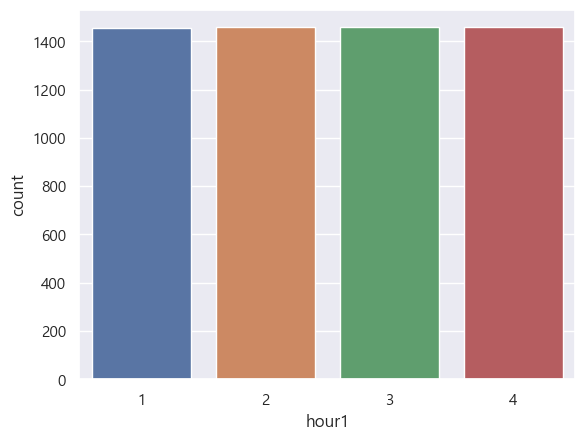

In [156]:
sns.countplot(x=a["hour1"])
plt.show()

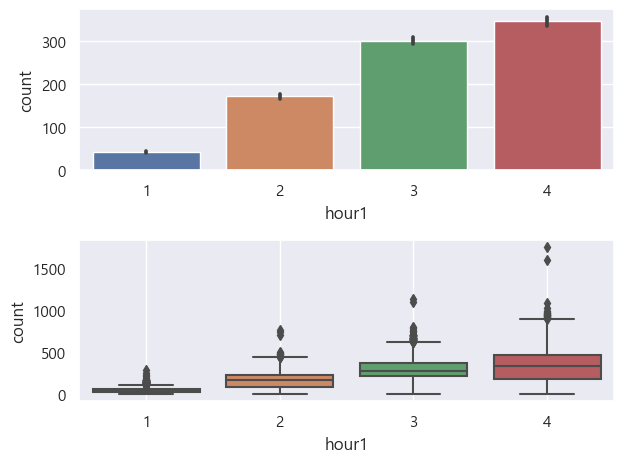

In [173]:
plt.subplot(2,1,1)
sns.barplot(x="hour1", y='count', data = a)
plt.subplot(2,1,2)
sns.boxplot(x="hour1", y='count', data = a)
plt.tight_layout()
plt.grid()
plt.show()

In [151]:
P_1 = a.loc[a.hour == 1, 'count']
P_2 = a.loc[a.hour == 2, 'count']
P_3 = a.loc[a.hour == 3, 'count']
P_4 = a.loc[a.hour == 4, 'count']
spst.f_oneway(P_1, P_2, P_3, P_4)

F_onewayResult(statistic=253.85716335977267, pvalue=2.191382824011994e-121)

In [152]:
a.groupby("hour1",as_index=False)[["count"]].sum()

,hour1,count
0,1,61544
1,2,249664
2,3,438678
3,4,503606


출퇴근 용으로 사용하기는 하지만 점심저녁 여가용 + 퇴근용 비율이 더 높은것으로 보인다.      
그리고 데이터양이 여름이 가장 많았는데도 불구하고 가을의 사용수가 많은것으로 보아 앞서서 분석했던것들이 어느정도 맞는 부분이 있는것같다.

자전거양을 보충 할 계획이라면 봄, 가을 점심저녁 시간대에 자전거양을 늘려야할것으로 보임

In [160]:
a["weekend"]=a["date"].dt.weekday
a["weekend"]=np.where(a["weekend"]<5,0,1)

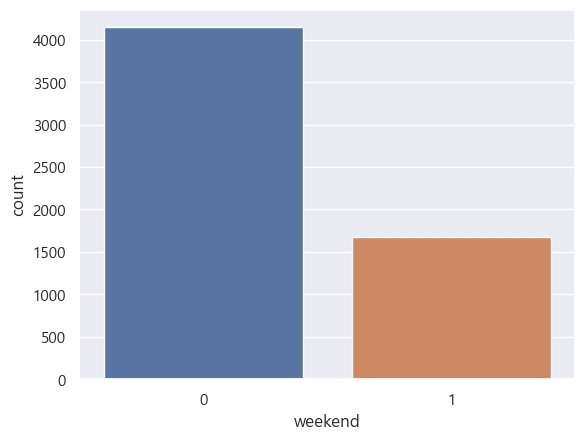

In [161]:
sns.countplot(x=a["weekend"])
plt.show()

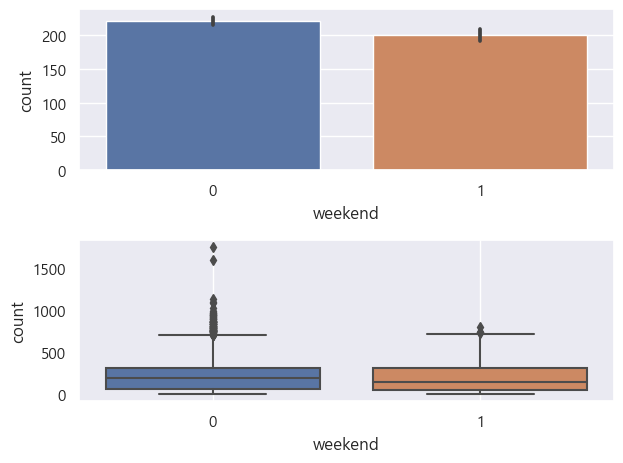

In [162]:
plt.subplot(2,1,1)
sns.barplot(x="weekend", y="count", data=a)
plt.subplot(2,1,2)
sns.boxplot(x='weekend', y = 'count', data = a)
plt.tight_layout()
plt.grid()
plt.show()

In [163]:
# temp = a.loc[a["precipitation"].notnull()]
c = a.loc[a["weekend"]==0, 'count']
d = a.loc[a["weekend"]==1, 'count']
spst.ttest_ind(c, d)
###########################################################평일에 더 많이 타는것으로 보인다.

Ttest_indResult(statistic=3.8974110319479296, pvalue=9.831763048935543e-05)

In [165]:
# a.groupby("weekend",as_index=False)[["count"]].mean()

,weekend,count
0,0,221.154087
1,1,200.217857


In [172]:
# a.groupby("weekend",as_index=False)[["count"]].sum()

,weekend,count
0,0,917126
1,1,336366


In [170]:
a.groupby(["season","hour1","weekend"],as_index=False)[["count"]].sum().sort_values(by="count",ascending=False)
###1.여름 저녁 평일, 가을 저녁 평일, 2.여름 점심 평일, 3.봄 저녁 평일, 4.가을 점심 평일
###전체 평균적으로 보면 봄의 사용량이 여름보다는 약간 높았지만, 세부적으로 구분하여보니 여름도 많다.(여름의 데이터가 많기 때문인것도 있다.)

,season,hour1,weekend,count
14,2,4,0,152216
22,3,4,0,104236
12,2,3,0,95880
6,1,4,0,94342
20,3,3,0,85476
4,1,3,0,80740
10,2,2,0,76002
18,3,2,0,52628
21,3,3,1,47892
15,2,4,1,47108
